# Imports

In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table as Table
import matplotlib.pyplot as plt
from linetools.spectra import utils as ltsu
from linetools.spectra.xspectrum1d import XSpectrum1D
import astropy.units as u
from astropy import constants as const
import numpy.random as ran
from scipy.optimize import curve_fit
import scipy.stats as stat
%matplotlib inline

# Read in

In [2]:
stack2 = fits.open("/home/jsm/Research/2018-2019/SB99/Fitting/data/2.5_data.fits")

stack3 = fits.open("/home/jsm/Research/2018-2019/SB99/Fitting/data/3.0_data.fits")

In [3]:
#2<z<2.5
flux_2 = stack2[1].data["FLUX"] # only the data I want 1000-1500A

wavelength_2 = stack2[1].data["WAVELENGTH"]

noise_2 = stack2[1].data["NOISE"]


#2.5<z<3

flux_3 = stack3[1].data["FLUX"] # only the data I want 1000-1500A

wavelength_3 = stack3[1].data["WAVELENGTH"]

noise_3 = stack3[1].data["NOISE"]

In [4]:
#Here is the read in of the models!

SB99_2 = fits.open("/home/jsm/Research/2018-2019/SB99/Fitting/data/2.5_model.fits")

model_2 = SB99_2[0].data

SB99_3 = fits.open("/home/jsm/Research/2018-2019/SB99/Fitting/data/3.0_model.fits")

model_3 = SB99_3[0].data

# Functions

In [17]:
def τ_eff(F_obs,F_mod):
    
    return -np.log(F_obs/F_mod)

In [29]:
ism_lines = np.array([1083.99, 1117.97, 1122.52, 1128.01, 1144.93, 1152.81])

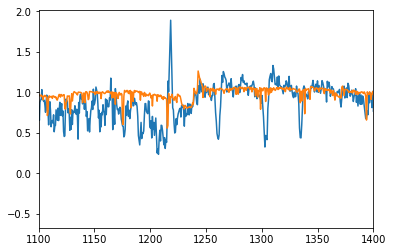

In [19]:
# test plots
plt.plot(wavelength_2,flux_2)
plt.plot(wavelength_2,model_2)
plt.xlim(1100,1400)
plt.show()

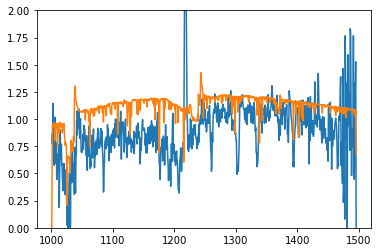

In [8]:
plt.plot(wavelength_3,flux_3)
plt.plot(wavelength_3,model_3)
plt.ylim(0,2)
#plt.xlim(1000,1400)
plt.show()

# 2.5 stack+++++++++++++++++++++++++++++++++++++++++++

In [9]:
z_2 = 2.418

red_2_err = 0.128

forest_2 = [ (1070 < entry) & (entry < 1170) for entry in wavelength_2 ]

lya_λ_2 = wavelength_2[forest_2]

lya_f_2 = flux_2[forest_2]

lya_m_2 = model_2[forest_2]

lya_s_2 = noise_2[forest_2]

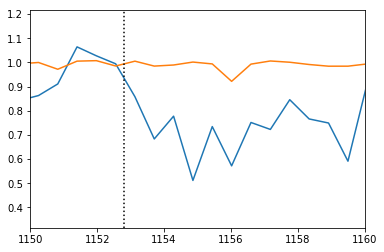

In [34]:
plt.plot(lya_λ_2,lya_f_2)
plt.plot(lya_λ_2,lya_m_2)
plt.xlim(1150,1160)

for i in ism_lines:
    
    plt.axvline(i,ls=":",color="black")

plt.show()

In [24]:
r = range(len(lya_λ_2))

value_mask = [lya_f_2[i] > lya_m_2[i] for i in r] # the model sits below the data

λ_2 = lya_λ_2[value_mask]  

f_2 = lya_f_2[value_mask]  

m_2 = lya_m_2[value_mask]

s_2 = lya_s_2[value_mask]

In [36]:
r = range(len(λ_2))

ism_mask = [4,12,13,15,18]

λ_2 = np.delete(λ_2,ism_mask)  

f_2 = np.delete(f_2,ism_mask)  

m_2 = np.delete(m_2,ism_mask)

s_2 = np.delete(s_2,ism_mask)

#print(λ_2)

#print(ism_lines)

#1088.1217041, 4

#1124.64526367,12

#1125.20788574,13

#1149.09777832,15

#1152.55187988,18


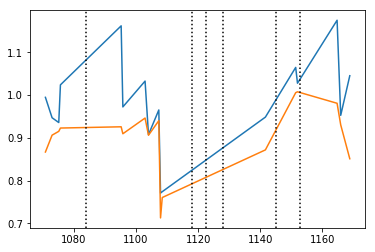

In [38]:
plt.plot(λ_2,f_2)
plt.plot(λ_2,m_2)

for i in ism_lines:
    
    plt.axvline(i,ls=":",color="black")

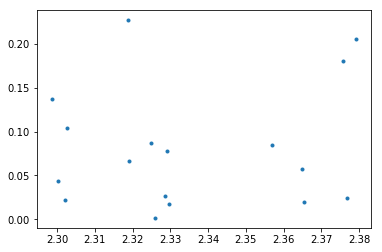

In [70]:
#τ_val_2 = τ_eff(f_2,m_2)

#z_dif = ((λ_2/1216)-1)

#z_2_vals = z_dif+z_2
#

#plt.plot(z_2_vals,-τ_val_2,".")
#plt.show()

In [ ]:
np.sqrt(238)

In [ ]:
#errors

τ_eff_2_u = np.median(τ_eff(f_2 + f_err_2 ,m_2 ))

τ_eff_2_d = np.median(τ_eff(f_2 - f_err_2 ,m_2 ))

τ_eff_err = ((τ_eff_2_d - τ_val_2) + (τ_val_2 - τ_eff_2_u))/2

τ_err_2 = np.sqrt(τ_eff_err**2 + τ_std_2**2) 


τ_err_2/1.5

# 3.0 stack++++++++++++++++++++++++++++++++++++++++++++++

In [52]:
z_3 = 2.657

red_3_err = 0.135

forest_3 = [ (1070 < entry) & (entry < 1170) for entry in wavelength_3 ]

lya_λ_3 = wavelength_3[forest_3]

lya_f_3 = flux_3[forest_3]

lya_m_3 = model_3[forest_3]

lya_s_3 = noise_3[forest_3]

In [ ]:
plt.plot(lya_λ_3,lya_f_3)
plt.plot(lya_λ_3,lya_m_3)

for i in ism_lines:
    
    plt.axvline(i,ls=":",color="black")
    
#plt.xlim(1080,1090)    
plt.show()

In [ ]:
#for i in range(len(lya_λ_3)):
    
#    if 1152 < lya_λ_3[i] < 1154:
        
#        print(i)

In [ ]:
bad_ind_3 = [0,24,25,26,27,28,29,30,92,95,96,97,134,135,136,137,138,147,148,149,150]

#for the 3 stack I masked out ism_lines[0,2,3,4,5]

In [ ]:
λ_3 = np.delete(lya_λ_3,bad_ind_3)  

f_3 = np.delete(lya_f_3,bad_ind_3)  

m_3 = np.delete(lya_m_3,bad_ind_3)

s_3 = np.delete(lya_s_3,bad_ind_3)  

In [ ]:
plt.plot(λ_3,f_3)

for i in ism_lines:
    
    plt.axvline(i,ls=":",color="black")

In [53]:
#τ_eff_3 = τ_eff(f_3,m_3)

τ_val_3 = np.median(1.2)

#τ_err_up_3 = τ_val_3 - (np.median(τ_eff(f_3+(np.median(s_3)),m_3)))

#τ_err_down_3 = (np.median(τ_eff(f_3-(np.median(s_3)),m_3)))-τ_val_3

#τ_err_3 = ((τ_err_down_3+τ_err_up_3)/2)/(np.sqrt(265))

# The plots

In [54]:
xrange = np.linspace(1.9,3.1,1000)

z_vals = np.array([z_2, z_3])

τ_eff_vals = np.array([τ_val_2,τ_val_3])

τ_err = np.array([0.1,0.1])

In [55]:
z_vals

array([ 2.418,  2.657])

In [56]:
#Faucher-Giguere

def F_G(z):
    
    τ_eff = 0.0018*(1+z)**3.92
    
    return τ_eff

In [57]:
#Becker

def Becker(z):
    
    τ_eff = .751*((1+z)/(1+3.5))**2.9 - .132
    
    return τ_eff

In [58]:
#Kirkman 
def D_a_to_τ_eff(D_a):
    
    τ_eff = -np.log(1-D_a)
    
    return τ_eff

z_vals_k = [1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0,3.2]

D_a_k = np.array([0.098,0.099,0.128,0.143,0.202,0.213,0.250,0.252,0.338])

D_a_k_sig = np.array([0.015,0.006,0.006,0.013,0.014,0.014,0.016,0.015,0.024])
                 
τ_eff_k = D_a_to_τ_eff(D_a_k)

τ_eff_k_sig =  D_a_to_τ_eff(D_a_k_sig)

In [59]:
#Schaye et al

z_vals_s = np.array([1.756,2.000,1.799,2.034,1.843,2.080,1.986,2.224,2.003,2.239,1.998,
            2.242,2.010,2.256,2.103,2.366,2.217,2.496,2.243,2.506,2.308,2.572,
            2.447,2.715,2.509,2.805,2.626,2.920,2.670,3.009,2.752,3.078,3.058,
            3.382,3.088,3.411,3.708,3.912,3.517,3.862,3.862,4.287])


τ_eff_s = np.array([0.099,0.093,0.120,0.162,0.224,0.124,0.128,0.164,0.180,0.113,0.139,
           0.149,0.115,0.156,0.131,0.175,0.137,0.214,0.180,0.205,0.234,0.283,
           0.177,0.308,0.182,0.273,0.279,0.343,0.232,0.360,0.329,0.271,0.423,
           0.496,0.366,0.445,0.705,0.811,0.644,0.843,0.839,0.827])


τ_err_s = np.array([0.016,0.016,0.026,0.026,0.033,0.019,0.019,0.026,0.027,0.018,0.021,
           0.018,0.014,0.021,0.019,0.022,0.020,0.029,0.025,0.022,0.029,0.032,
           0.025,0.041,0.021,0.030,0.033,0.037,0.023,0.040,0.043,0.030,0.034,
           0.048,0.039,0.041,0.074,0.065,0.056,0.075,0.069,0.060])

In [60]:
good_s = [ (2.0 < entry) & (entry < 3.0) for entry in z_vals_s]

z_vals_s = z_vals_s[good_s]

τ_eff_s = τ_eff_s[good_s]

τ_err_s = τ_err_s[good_s]

In [61]:
#Thomas

thomas_τ_eff = -np.log(0.79)

thomas_τ_err = (-np.log(.79+0.005)-(-np.log(0.79)))

thomas_z = 2.75

In [68]:
fig, ax = plt.subplots(figsize=(12,6))

#my work
plt.errorbar(z_vals, τ_eff_vals, yerr = 0.03, capsize=5, marker="o",label="This work",color="#b2182b",ls="none")
plt.text(z_2-.05,τ_eff_vals[0]+.035,"$z_{median}$ = 2.418",fontsize=10)
plt.text(z_3-.05,τ_eff_vals[1]+.035,"$z_{median}$ = 2.657",fontsize=10)

#the others
plt.plot(xrange,F_G(xrange), label = "Faucher-Giguere et al. 2008",color="tan",ls="--")
plt.plot(xrange,Becker(xrange), label = "Becker et al. 2013",color="#fdae61",ls="--")
plt.errorbar(z_vals_k,τ_eff_k, yerr = τ_eff_k_sig, capsize=5, marker="D",label="Kirkman et al. 2005",color="c",ls="none")
plt.errorbar(z_vals_s,τ_eff_s, yerr = τ_err_s, capsize=5, marker="^",label="Schaye et al 2003",color="#4d4d4d",ls="none")
plt.errorbar(thomas_z,thomas_τ_eff,thomas_τ_err,capsize=5,marker="*",label="Thomas et al 2017",color="#d95f0e")
plt.text(thomas_z-.05,thomas_τ_eff-.02,"$z_{median}$ = 2.75",fontsize=10)


plt.xlabel("$z$",fontsize=18)
plt.ylabel("$τ_{eff}$",fontsize=18)
plt.xlim(1.95,3.05)

plt.legend()
plt.title("Effective Lyα Opacity",fontsize=20)
plt.show()

#fig.savefig("/home/jsm/my_lbg_da/lbg_da/summer_2018/figures/png/Effective_Lyα_Opacity.png",bbox_inches='tight')

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
hmmm_2 = fits.open("/home/jsm/PycharmProjects/Summer_Research_2018/SB99/for_sebastien/2.5_params.fits")


hmmm_3 = fits.open("/home/jsm/PycharmProjects/Summer_Research_2018/SB99/for_sebastien/3.0_params.fits")


In [ ]:
hmmm_3[1].data["MODEL_AGE"]

In [ ]:
hmmm_2[1].data["MODEL_AGE"]

In [ ]:
hmmm_2[1].header